In [1]:
%tensorflow_version 2.x # Load tensorflow 2.x into notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Load tensorflow 2.x into notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [28]:
!pip install -q sklearn # install scikit-learn

We import all the libraries needed

In [4]:
# from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

Let´s load the data from houses

In [6]:
dftrain = pd.read_csv('https://raw.githubusercontent.com/jcrecio/ml_housepricing/main/TrainData.csv') # train data frame
dftest = pd.read_csv('https://raw.githubusercontent.com/jcrecio/ml_housepricing/main/TestData.csv') # eval/test data frame

y_train = dftrain.pop('Price') # Get the price from train data
y_eval = dftest.pop('Price') # Get the price from test data

We can check the data shape and the labels

In [24]:
print(dftrain.head())


   Rooms  Size  ExternalView  Floor  ...  Attic  Elevator  Bathrooms  Neighbourhood
0      5   172             0      9  ...      2         0          3              1
1      5   171             1     10  ...      2         1          3              1
2      5   166             1      4  ...      0         1          3              1
3      5   171             1      9  ...      0         1          3              1
4      5   156             1      3  ...      1         1          2              1

[5 rows x 9 columns]


In [14]:
dftrain.describe()

,Rooms,Size,ExternalView,Floor,Balconies,Attic,Elevator,Bathrooms,Neighbourhood
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.048000,117.906667,0.498000,5.053000,0.104333,0.541333,0.501000,1.712333,2.990667
std,1.412218,29.832722,0.500079,3.155552,0.305743,0.675112,0.500082,0.693596,1.418656
min,1.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,92.750000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,3.000000,117.000000,0.000000,5.000000,0.000000,0.000000,1.000000,2.000000,3.000000
75%,4.000000,144.000000,1.000000,8.000000,0.000000,1.000000,1.000000,2.000000,4.000000
max,5.000000,172.000000,1.000000,10.000000,1.000000,2.000000,1.000000,3.000000,5.000000


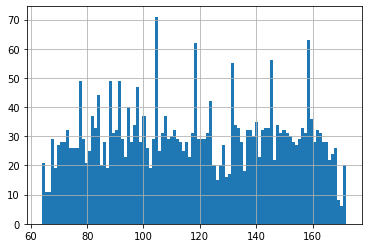

In [27]:
dftrain.Size.hist(bins=100) # house sizes distribution

In [23]:
feature_columns = []
for feature_name in dftrain.keys():
	feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
 
print(feature_columns)

[NumericColumn(key='Rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Size', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='ExternalView', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Floor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Balconies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Attic', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Elevator', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Bathrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Neighbourhood', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


Creates batches with the data and train for N epochs (we can shuffle or not)

In [31]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dftest, y_eval, num_epochs=1, shuffle=False)

Now we create our model (Linear regression)

In [32]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph67czw3t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


We train our model with the train data

In [40]:
linear_est.train(train_input_fn)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph67czw3t/model.ckpt-940
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 940...
INFO:tensorflow:Saving checkpoints for 940 into /tmp/tmph67czw3t/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 940...
INFO:tensorflow:loss = 30760575000.0, step = 940
INFO:tensorflow:global_step/sec: 531.456
INFO:tensorflow:loss = 28339302000.0, step = 1040 (0.194 sec)
INFO:tensorflow:global_step/sec: 820.168
INFO:tensorflow:loss = 26203660000.0, step = 1140 (0.118 sec)
INFO:tensorflow:global_step/sec: 881.014
INFO:tensorflow:loss = 24061182000.0, step = 1240 (0.116 sec)
INFO:tensorflow:global_step/sec: 846.501
INFO:tensorflow:loss = 2

And we evaluate the model with our evaluation/test data

In [41]:
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-02T00:41:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph67czw3t/model.ckpt-1880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.37984s
INFO:tensorflow:Finished evaluation at 2021-03-02-00:41:04
INFO:tensorflow:Saving dict for global step 1880: average_loss = 17063446000.0, global_step = 1880, label/mean = 126112.17, loss = 17065261000.0, prediction/mean = 2058.7297
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1880: /tmp/tmph67czw3t/model.ckpt-1880


In [44]:
predictions = list(linear_est.predict(eval_input_fn))
print(y_eval[0])
print(predictions[0])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph67czw3t/model.ckpt-1880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
87401
{'predictions': array([1650.1045], dtype=float32)}
